In [57]:
# %%capture
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib
# %pip install scikit-learn

import warnings

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

def get_data():
    data = pd.read_csv(
        "C:\\Users\\Mike Odnis\\documents\\github\\testingthingsout\\practice\\class\\csc 466\\assignment\\wheat.csv"
    )
    return data

df = get_data()

In [58]:
def clean_data(df):
    df.dropna(inplace=True)
    return df

In [59]:
def split_data(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1] 
    return X, y

def train_test_split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    return X_train, X_test, y_train, y_test

def train_naive_bayes(X_train, y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    return nb_model

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    return accuracy, confusion_mat

def plot_roc_curve(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, i], pos_label=model.classes_[i])
        plt.plot(fpr, tpr, lw=2, label=f"Class {model.classes_[i]}")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (One-vs-Rest)")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_precision_recall_curve(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        precision, recall, _ = precision_recall_curve(
            y_test, y_probs[:, i], pos_label=model.classes_[i]
        )
        plt.plot(recall, precision, lw=2, label=f"Class {model.classes_[i]}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve (One-vs-Rest)")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_classwise_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    class_labels = model.classes_
    metrics_df = pd.DataFrame(
        {"Precision": precision, "Recall": recall, "F1-Score": f1}, index=class_labels
    )
    metrics_df.index.name = "Class"
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics_df, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Class-wise Performance Metrics")
    plt.show()

In [60]:
df = clean_data(df)

X, y = split_data(df)

X_train, X_test, y_train, y_test = train_test_split_data(X, y)

nb_model = train_naive_bayes(X_train, y_train)

accuracy, confusion_mat = evaluate_model(nb_model, X_test, y_test)

In [61]:
print("Accuracy:", accuracy)

Accuracy: 0.873015873015873


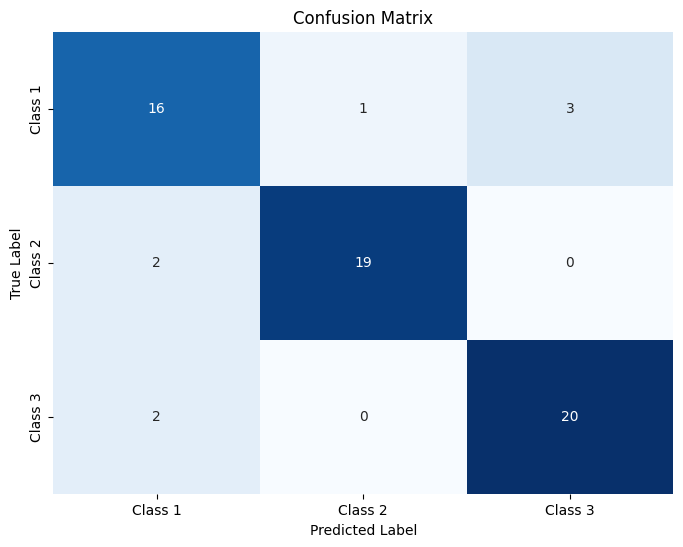

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_mat,
    annot=True,
    cmap="Blues",
    fmt="d",
    cbar=False,
    xticklabels=["Class 1", "Class 2", "Class 3"],
    yticklabels=["Class 1", "Class 2", "Class 3"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

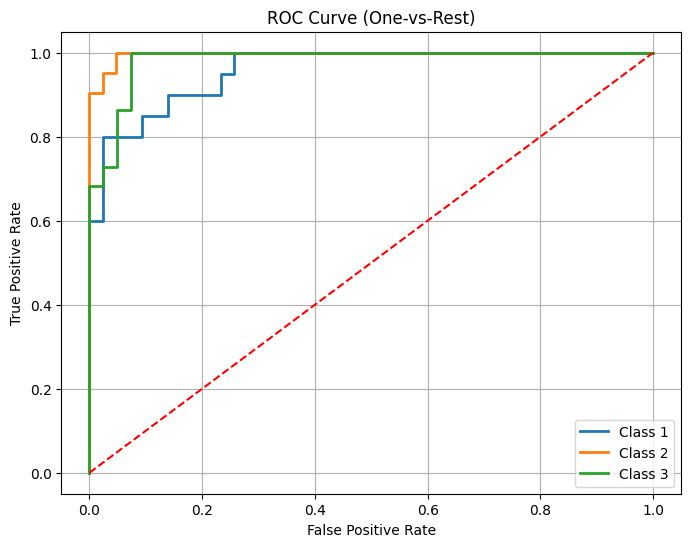

In [63]:
plot_roc_curve(nb_model, X_test, y_test)
# Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

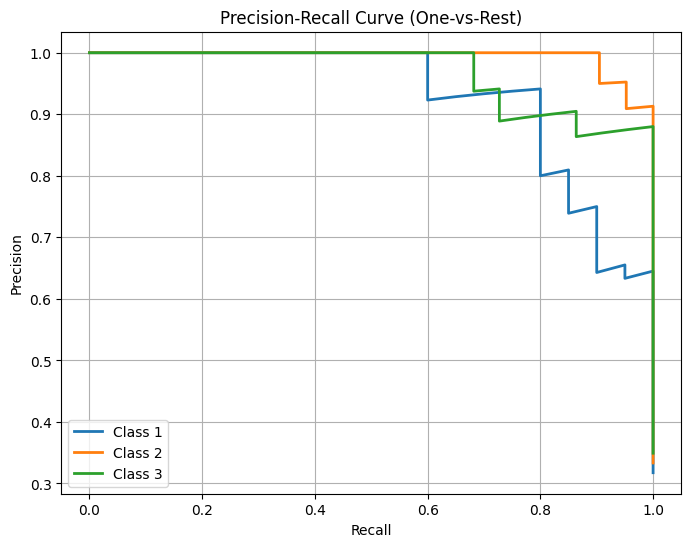

In [64]:
plot_precision_recall_curve(nb_model, X_test, y_test)
# Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

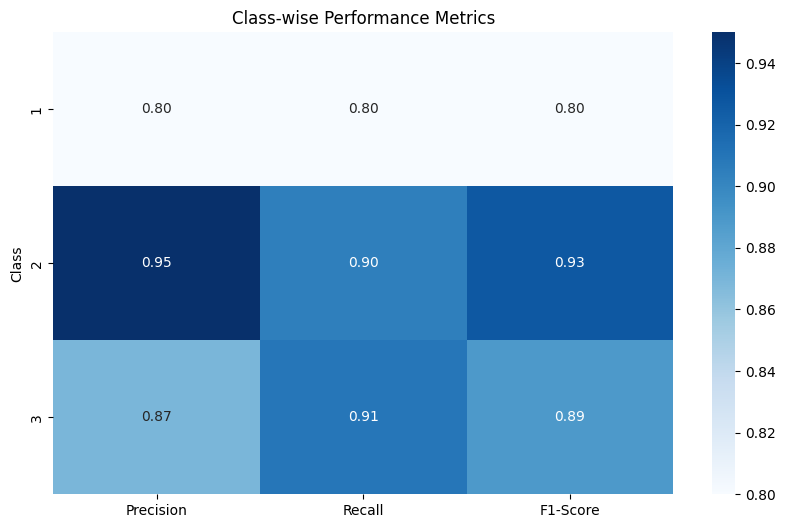

In [65]:
plot_classwise_metrics(nb_model, X_test, y_test)
# Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html